# Project 2 (House Prices: Advanced Regression Techniques)





## Team Name:   SUPER_DATA_SCIENCE   

#### TEAM Members:
##### - Khwla Alsafri (Future Data Scientist)
##### - Najwa Alharbi (Future Data Scientist)
##### - Ahmed Tawfiq (Future Data Scientist)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
np.set_printoptions(precision=4)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)

In [2]:
train_data = pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')

In [3]:
train_data.shape

(1460, 81)

In [4]:
test_data.shape

(1459, 80)

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


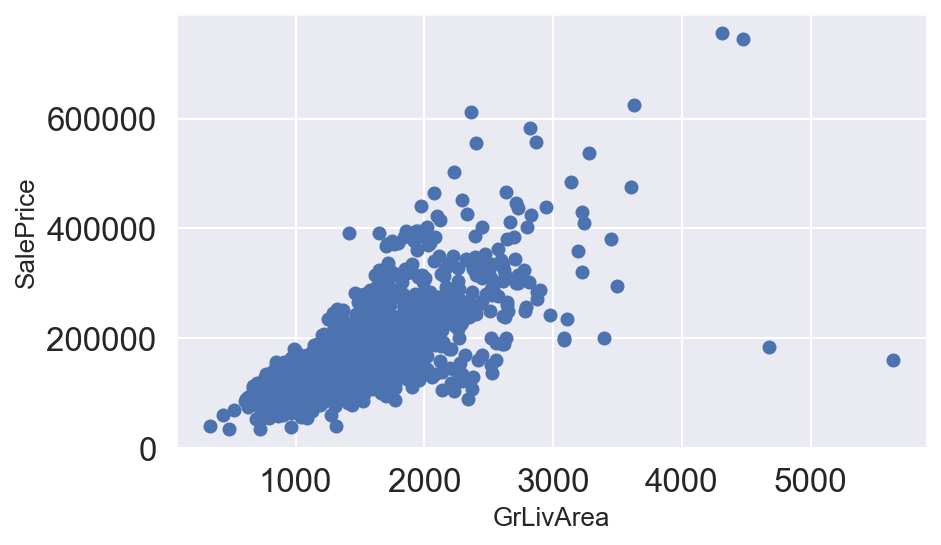

In [7]:
fig,ax=plt.subplots()
ax.scatter(x=train_data['GrLivArea'],y=train_data['SalePrice'])
plt.xlabel('GrLivArea',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)
plt.show()

In [8]:
#save SalePrice in sales
y_train = train_data['SalePrice']

In [9]:
# Dropping the saleprice from the train data
train_data.drop('SalePrice',axis=1, inplace= True)

# concatenate data

In [10]:
# concat the train data with test data to do cleaing
concat_df = pd.concat([train_data,test_data], axis=0, sort=True)

# check the missing value

In [11]:
#check the missing value
concat_df.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley           2721
BedroomAbvGr       0
                ... 
Utilities          2
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
Length: 80, dtype: int64

In [12]:
# check the dataframe information
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [13]:
total =concat_df.isnull().sum()
missing_data = pd.concat([total], axis=1, keys=['Total'])
missing_data.head(40)

,Total
1stFlrSF,0
2ndFlrSF,0
3SsnPorch,0
Alley,2721
BedroomAbvGr,0
BldgType,0
BsmtCond,82
BsmtExposure,82
BsmtFinSF1,1
BsmtFinSF2,1


In [14]:
missing_data.tail(40)

,Total
Heating,0
HeatingQC,0
HouseStyle,0
Id,0
KitchenAbvGr,0
KitchenQual,1
LandContour,0
LandSlope,0
LotArea,0
LotConfig,0


# fill the missing value

In [15]:
# Replase the nan value 
def replace_nan(data,coulmn,value):
    for i in coulmn:
        for x in value:
            data[i] =data[i].fillna(x)

In [16]:
column=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageCond'
       ,'GarageType','GarageFinish','GarageQual','MiscFeature','PoolQC','Fence','MiscFeature','Exterior1st','Exterior2nd','Functional','KitchenQual','SaleType'
       ,'Utilities','MSZoning']
value=['No Alley','None','No_Bsmt','No_Bsmt','No_Bsmt','No_Bsmt','No_Bsmt','SBrkr','No Fireplace','No Garage',
       'No Garage','No Garage','No Garage','None','None','no Fence','None','VinylSd','VinylSd','Typ','TA','WD','AllPub','RL']
replace_nan(concat_df,column,value)

In [17]:
int_columns=['LotFrontage','MasVnrArea','GarageYrBlt','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','GarageArea','TotalBsmtSF','GarageCars'
]
the_value=[70.0,103.685262,439.20,52.61, 0.43,0.0,554.29,472.76,1046.11,1.7,concat_df.median()]
replace_nan(concat_df,int_columns,the_value)

#  Check after changing the nan value

In [18]:
total =concat_df.isnull().sum()
missing_data = pd.concat([total], axis=1, keys=['Total'])
missing_data.head(40)

,Total
1stFlrSF,0
2ndFlrSF,0
3SsnPorch,0
Alley,0
BedroomAbvGr,0
BldgType,0
BsmtCond,0
BsmtExposure,0
BsmtFinSF1,0
BsmtFinSF2,0


In [19]:
missing_data.tail(40)

,Total
Heating,0
HeatingQC,0
HouseStyle,0
Id,0
KitchenAbvGr,0
KitchenQual,0
LandContour,0
LandSlope,0
LotArea,0
LotConfig,0


# Check the value type

In [20]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      29

In [21]:
concat_df['LotFrontage']= concat_df['LotFrontage'].astype(int)

In [22]:
concat_df['MasVnrArea']= concat_df['MasVnrArea'].astype(int)

In [23]:
concat_df['GarageYrBlt']= concat_df['GarageYrBlt'].astype(int)

In [24]:
concat_df['BsmtFinSF1']= concat_df['BsmtFinSF1'].astype(int)

In [25]:
concat_df['BsmtFinSF2']= concat_df['BsmtFinSF2'].astype(int)

In [26]:
concat_df['BsmtFullBath']= concat_df['BsmtFullBath'].astype(int)

In [27]:
concat_df['BsmtHalfBath']= concat_df['BsmtHalfBath'].astype(int)

In [28]:
concat_df['BsmtUnfSF']= concat_df['BsmtUnfSF'].astype(int)

In [29]:
concat_df['GarageArea']= concat_df['GarageArea'].astype(int)


In [30]:
concat_df['TotalBsmtSF']= concat_df['TotalBsmtSF'].astype(int)

In [31]:
concat_df['GarageCars']= concat_df['GarageCars'].astype(int)

In [32]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null int32
BsmtFinSF2       2919 non-null int32
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null int32
BsmtHalfBath     2919 non-null int32
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null int32
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2919 non-nul

In [33]:
concat_df.tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1454,546,546,0,No Alley,3,Twnhs,TA,No,0,0,...,WD,0,Pave,5,546,AllPub,0,1970,1970,2006
1455,546,546,0,No Alley,3,TwnhsE,TA,No,252,0,...,WD,0,Pave,6,546,AllPub,0,1970,1970,2006
1456,1224,0,0,No Alley,4,1Fam,TA,No,1224,0,...,WD,0,Pave,7,1224,AllPub,474,1960,1996,2006
1457,970,0,0,No Alley,3,1Fam,TA,Av,337,0,...,WD,0,Pave,6,912,AllPub,80,1992,1992,2006
1458,996,1004,0,No Alley,3,1Fam,TA,Av,758,0,...,WD,0,Pave,9,996,AllPub,190,1993,1994,2006


In [34]:
concat_df.shape

(2919, 80)

In [35]:
# Creating dummies for object columns only
concat_df = pd.get_dummies(concat_df,drop_first=True)
concat_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_No Alley,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_No Alley,Utilities_NoSeWa
0,856,854,0,3,706,0,1,0,150,0,...,0,0,0,0,0,0,1,1,0,0
1,1262,0,0,3,978,0,0,1,284,0,...,0,0,0,0,0,0,1,1,0,0
2,920,866,0,3,486,0,1,0,434,0,...,0,0,0,0,0,0,1,1,0,0
3,961,756,0,3,216,0,1,0,540,272,...,0,0,0,0,0,0,1,1,0,0
4,1145,1053,0,4,655,0,1,0,490,0,...,0,0,0,0,0,0,1,1,0,0


In [36]:
concat_df.shape

(2919, 269)

In [37]:
concat_df.corr()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_No Alley,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_No Alley,Utilities_NoSeWa
1stFlrSF,1.000000,-0.249823,0.044086,0.108418,0.458192,0.084295,0.148767,0.080742,0.296770,-0.065796,...,-0.025617,0.001209,-0.044160,0.214337,0.000775,-0.004251,-0.162950,0.033956,-0.001174,0.008703
2ndFlrSF,-0.249823,1.000000,-0.032458,0.503506,-0.162046,-0.097766,-0.064444,-0.028388,-0.000075,0.054645,...,-0.030842,-0.003710,0.003793,0.016457,-0.014533,-0.038489,0.035178,0.038458,-0.020556,-0.014533
3SsnPorch,0.044086,-0.032458,1.000000,-0.048279,0.050931,-0.023283,0.004979,0.000891,-0.005770,-0.032822,...,-0.009796,-0.005747,-0.005417,0.027589,-0.001913,-0.005066,-0.014679,0.006639,-0.002706,-0.001913
BedroomAbvGr,0.108418,0.503506,-0.048279,1.000000,-0.113221,-0.031260,-0.023338,0.022689,0.183586,0.049940,...,-0.037084,0.039499,-0.022958,-0.043436,0.003146,0.033877,0.047450,0.041155,-0.027384,0.003146
BsmtFinSF1,0.458192,-0.162046,0.050931,-0.113221,1.000000,-0.055073,0.154368,-0.012730,-0.476936,-0.099598,...,-0.032120,0.011332,-0.020189,0.044285,-0.010213,0.009332,-0.008440,0.016662,-0.025368,-0.013424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleType_Oth,-0.004251,-0.038489,-0.005066,0.033877,0.009332,-0.014374,0.002429,-0.002902,-0.005550,0.002433,...,-0.004648,-0.002727,-0.002570,-0.014641,-0.000908,1.000000,-0.124118,0.003150,-0.001284,-0.000908
SaleType_WD,-0.162950,0.035178,-0.014679,0.047450,-0.008440,0.053103,-0.020026,-0.024402,-0.199914,0.049615,...,-0.239991,-0.140785,-0.132711,-0.755987,-0.046864,-0.124118,1.000000,0.005958,-0.027972,-0.046864
Street_Pave,0.033956,0.038458,0.006639,0.041155,0.016662,-0.008354,-0.000761,0.003803,0.020628,-0.039828,...,-0.107879,0.003573,0.003368,0.019187,0.001189,0.003150,0.005958,1.000000,-0.202933,0.001189
Utilities_No Alley,-0.001174,-0.020556,-0.002706,-0.027384,-0.025368,-0.007677,-0.006601,-0.001550,0.015217,0.019935,...,0.136862,-0.001456,-0.001373,-0.007819,-0.000485,-0.001284,-0.027972,-0.202933,1.000000,-0.000485


In [39]:
# Separating dataframe into train set

df_train = concat_df.iloc[0:1460 , : ]

df_train.shape

(1460, 269)

In [43]:
# Separating dataframe into test set    

df_test =concat_df.iloc[1460: , : ]
df_test.shape

(1459, 269)

In [44]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel


In [45]:
from sklearn.preprocessing import StandardScaler


# train_test_split

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score

# StandardScaler

In [47]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_ss = ss.fit_transform(df_train)
X_test_ss = ss.transform(df_test)

# LinearRegression

In [48]:
lr = LinearRegression()
lr.fit(X_train_ss,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
from sklearn.model_selection import KFold
from sklearn import datasets
kf = KFold(n_splits=5, shuffle=True, random_state=100) # notice shuffle
scores = cross_val_score(lr, X_train_ss,y_train, cv=kf)

print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

Cross-validated training scores: [ 7.8937e-02 -2.8209e+22 -1.6819e+23 -1.6335e+24 -7.9993e+25]
Mean cross-validated training score: -1.636456275232763e+25


In [50]:
print("R-score is:",lr.score(X_train_ss, y_train))

R-score is: 0.9332979305652617


In [51]:
df_prdict= lr.predict(X_test_ss)
df_prdict


array([113368.9182, 161671.2885, 187620.8271, ..., 181737.828 ,
       117680.6632, 225661.3099])

# Lasso

In [53]:
lasso_ = Lasso(alpha=.2)
lasso_.fit(X_train_ss, y_train)
print('Testing Score:',lasso_.score(X_train_ss, y_train))
lasso__pred=lasso_.predict(X_test_ss)
print(lasso__pred)


Testing Score: 0.9332782161760853
[113017.2336 161026.5609 187410.2621 ... 181526.8692 117059.7521
 225734.9736]


C:\Users\omar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288181883881.3838, tolerance: 920791133.4609977
  positive)


# LassoCV

In [54]:
lasso_cv = LassoCV()
lasso_cv.fit(X_train_ss, y_train)
print('The Beast alpha :' , lasso_cv.alpha_)
print('The Beast score :' , lasso_cv.score(X_train_ss, y_train))

lassocv__pred=lasso_cv.predict(X_test_ss)
print('thr test predict:',lassocv__pred)

C:\Users\omar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The Beast alpha : 722.2317530437753
The Beast score : 0.898040461629451
thr test predict: [108499.1898 156707.999  175350.4873 ... 172739.9519 109360.181
 226221.3655]


In [55]:
lasso_cv.coef_


array([ 0.0000e+00,  0.0000e+00,  5.8040e+01, -1.1119e+03,  3.1707e+03,
        0.0000e+00,  2.5990e+03, -0.0000e+00, -0.0000e+00, -0.0000e+00,
        2.1915e+03,  2.0037e+03,  1.4481e+02,  6.8459e+03, -0.0000e+00,
        2.3588e+04,  4.7447e+01, -0.0000e+00, -2.1431e+03,  3.1351e+03,
       -0.0000e+00, -1.1489e+03, -5.4485e+03,  3.4131e+03, -0.0000e+00,
       -2.1042e+02,  1.4829e+02,  5.0930e+03,  1.4994e+04,  6.9595e+03,
        1.7909e+03,  3.2007e+03,  3.3136e+03,  2.1474e+03,  7.3495e+03,
        2.2709e+03, -0.0000e+00,  0.0000e+00, -0.0000e+00,  0.0000e+00,
       -9.7045e+02, -1.4015e+03, -1.1604e+03,  0.0000e+00, -0.0000e+00,
        0.0000e+00,  7.6421e+02,  5.1919e+03, -0.0000e+00, -2.2897e+03,
       -4.0711e+02,  0.0000e+00,  1.9507e+03, -0.0000e+00, -0.0000e+00,
       -0.0000e+00, -1.0617e+03, -0.0000e+00,  1.9438e+02, -2.9130e+01,
       -0.0000e+00, -0.0000e+00,  0.0000e+00, -6.2748e+01, -5.3738e+03,
       -0.0000e+00, -3.6637e+03,  0.0000e+00, -1.8698e+02,  2.94

In [56]:
coef = pd.Series(lasso_cv.coef_, index = df_train.columns)
coef


1stFlrSF                 0.000000
2ndFlrSF                 0.000000
3SsnPorch               58.040219
BedroomAbvGr         -1111.934668
BsmtFinSF1            3170.666072
                         ...     
SaleType_Oth             0.000000
SaleType_WD             -0.000000
Street_Pave            863.326803
Utilities_No Alley       0.000000
Utilities_NoSeWa      -407.804432
Length: 269, dtype: float64

In [57]:
selec = coef[coef != 0]
selec

3SsnPorch             58.040219
BedroomAbvGr       -1111.934668
BsmtFinSF1          3170.666072
BsmtFullBath        2599.004635
Fireplaces          2191.539638
                       ...     
SaleType_CWD          85.946734
SaleType_Con         428.071714
SaleType_New        5108.012764
Street_Pave          863.326803
Utilities_NoSeWa    -407.804432
Length: 113, dtype: float64

In [58]:
selected_feat = selec.index
selected_feat

Index(['3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'Fireplaces',
       'FullBath', 'GarageArea', 'GarageCars', 'GrLivArea', 'HalfBath',
       ...
       'RoofMatl_Membran', 'RoofMatl_WdShngl', 'RoofStyle_Gable',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_New', 'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=113)

In [59]:
print(len(selected_feat))

113


In [60]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 113 variables and eliminated the other 156 variables


In [61]:
imp_coef = coef.sort_values()
imp_coef

PoolQC_Gd               -9053.383048
KitchenQual_Gd          -7675.798696
KitchenQual_TA          -7286.207799
Condition2_PosN         -5599.247708
MSSubClass              -5448.504816
                            ...     
PoolArea                 6959.539551
YearBuilt                7349.502535
Neighborhood_NridgHt     8435.009891
OverallQual             14994.003711
GrLivArea               23588.436108
Length: 269, dtype: float64

In [62]:
print(selected_feat)

Index(['3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'Fireplaces',
       'FullBath', 'GarageArea', 'GarageCars', 'GrLivArea', 'HalfBath',
       ...
       'RoofMatl_Membran', 'RoofMatl_WdShngl', 'RoofStyle_Gable',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_New', 'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=113)


Text(0.5, 1.0, 'Feature importance using Lasso Model')

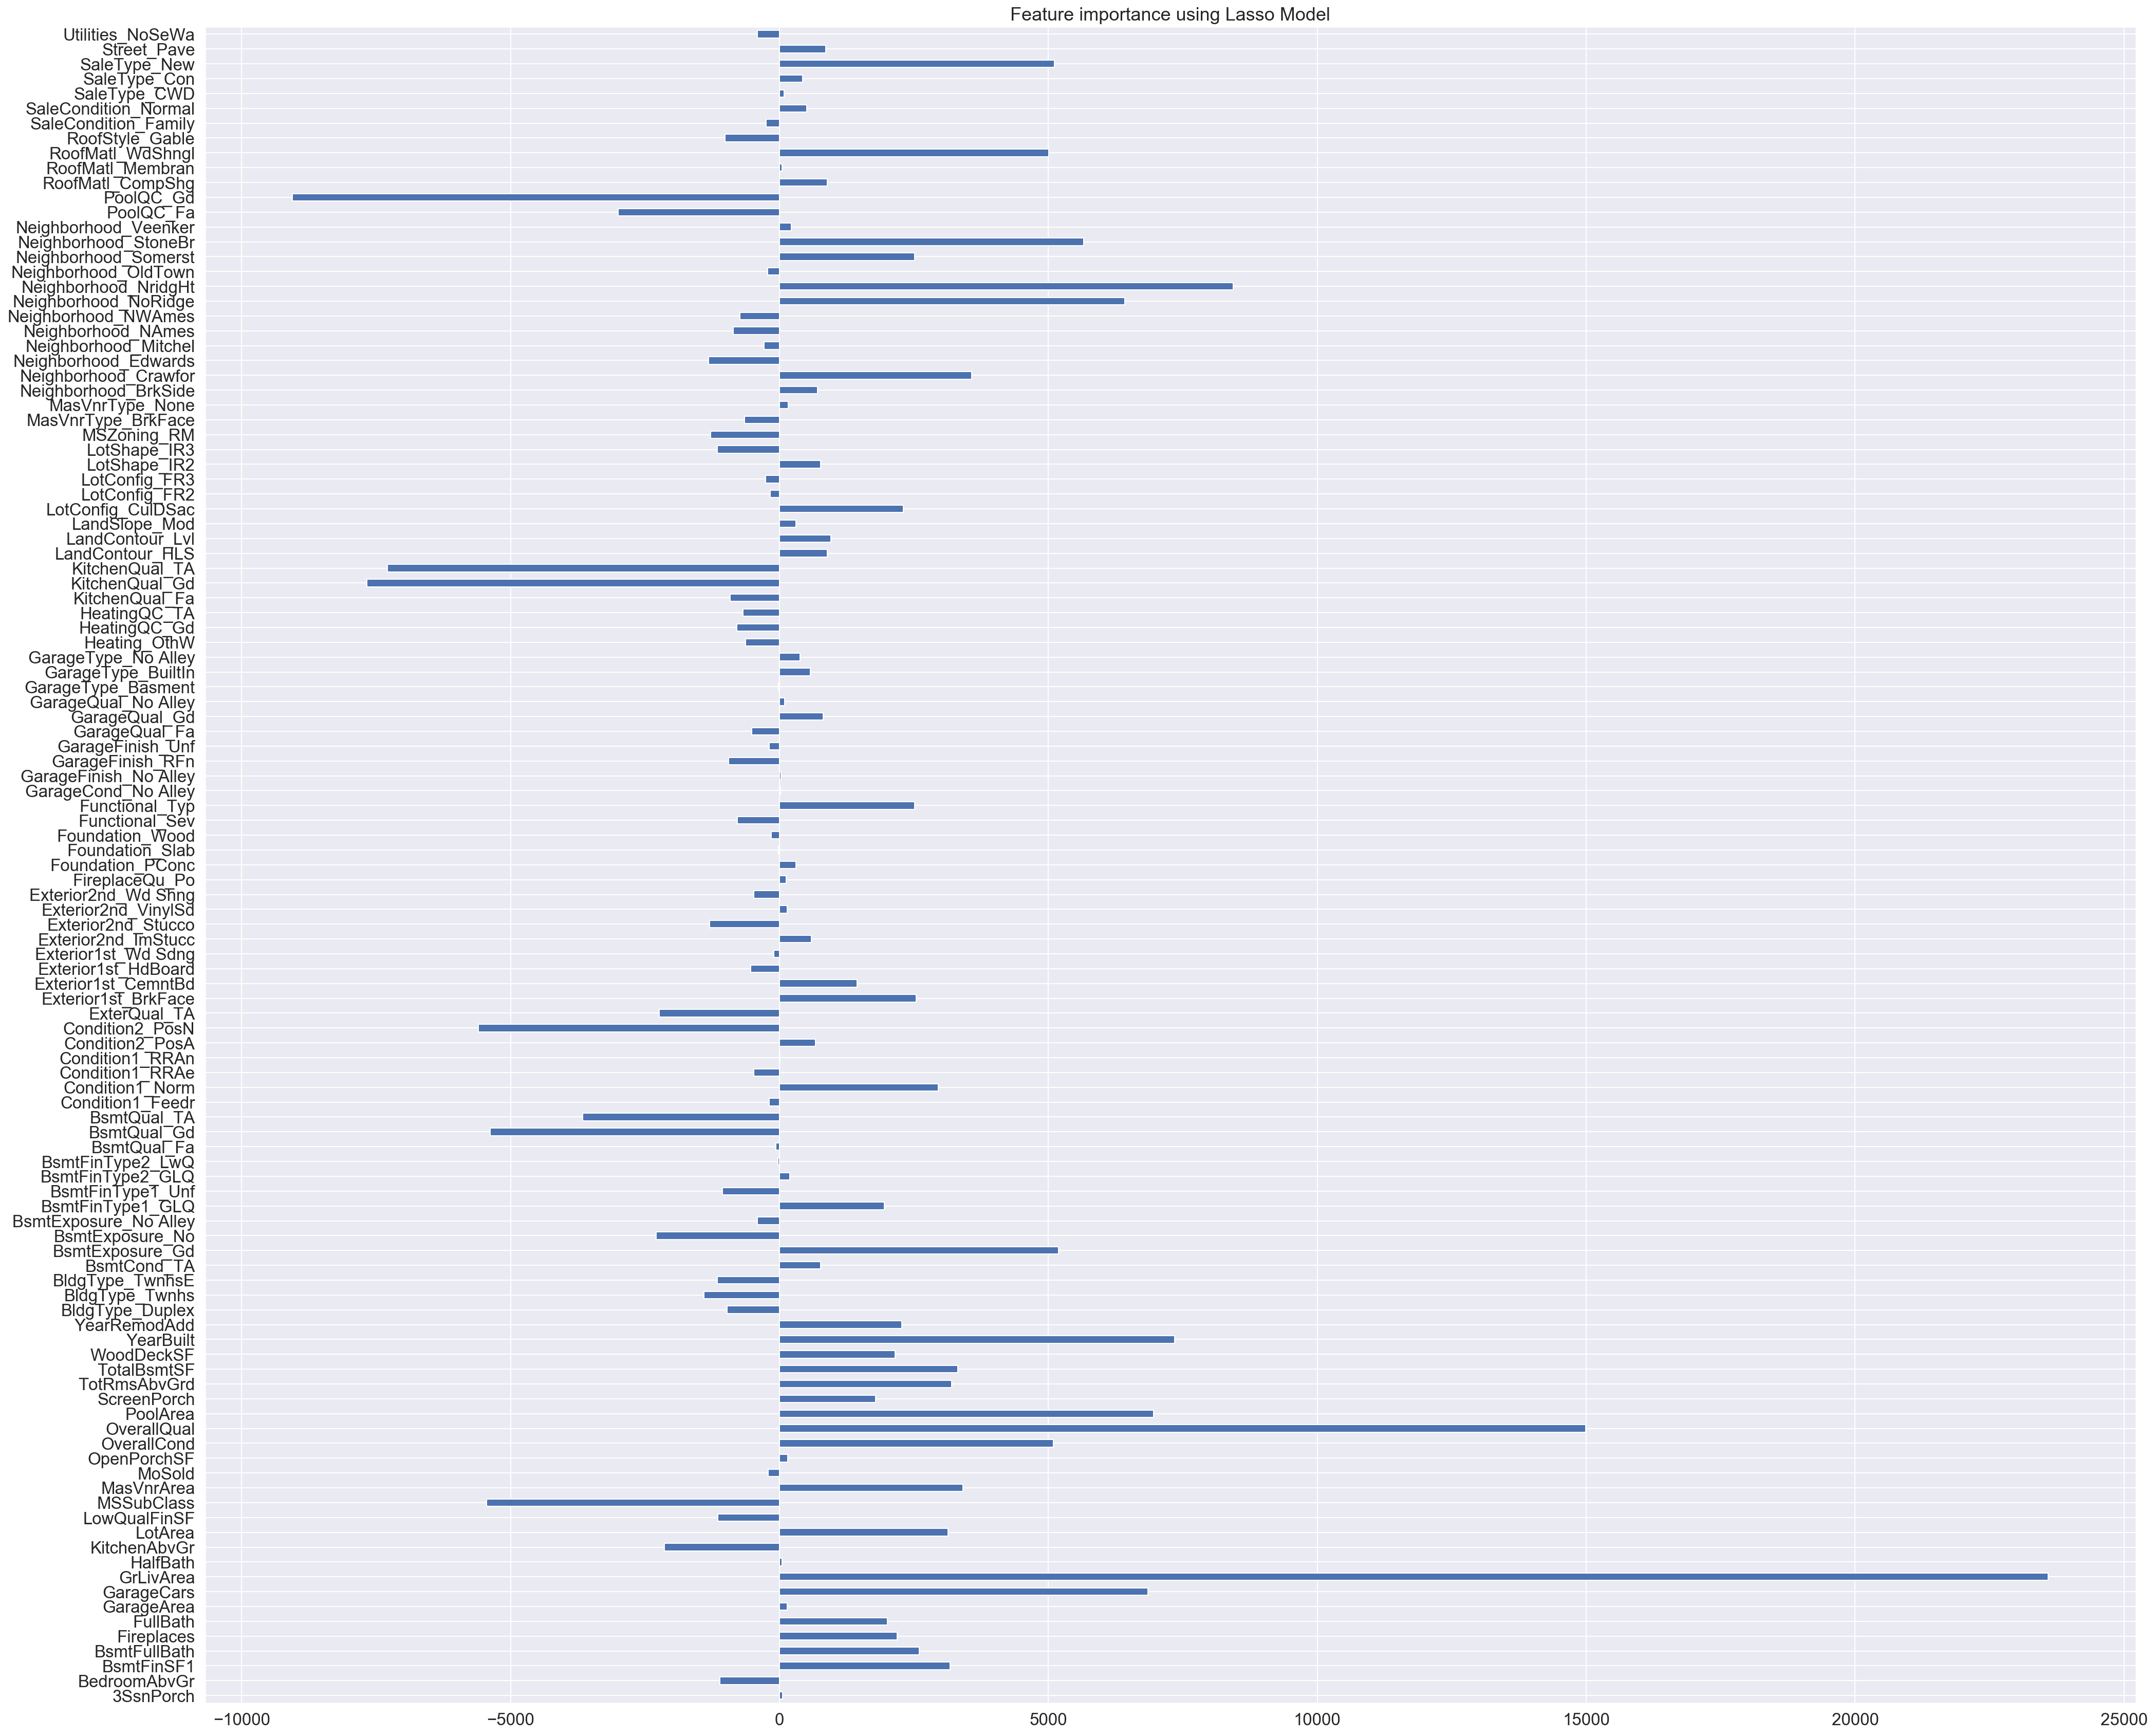

In [63]:
imp_coef = selec
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# DecisionTreeRegressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 10)
dt.fit(X_train_ss, y_train)
print('Traing Score:',dt.score(X_train_ss, y_train))
dt_prdict= dt.predict(X_test_ss)

print('Testing predict:',dt_prdict)

Traing Score: 0.9825234878174702
Testing predict: [139480.4918 163000.     175806.25   ... 152296.      89142.8571
 220750.    ]


# RidgeCV 1

In [65]:
from sklearn.linear_model import  RidgeCV
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

r_cv = RidgeCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30])


r_cv.fit(X_train_ss, y_train)


kf = KFold(n_splits=5, shuffle=True, random_state=100) # notice shuffle
scores = cross_val_score(r_cv, X_train_ss, y_train, cv=kf)

print('Traing Score:',r_cv.score(X_train_ss, y_train))
r_cv_prdict= r_cv.predict(X_test_ss)

print('Testing predict:',r_cv_prdict)

Cross-validated training scores: [ 7.8937e-02 -2.8209e+22 -1.6819e+23 -1.6335e+24 -7.9993e+25]
Mean cross-validated training score: -1.636456275232763e+25
Traing Score: 0.9234563922507503
Testing predict: [106312.4818 153970.945  180264.3224 ... 168932.5363 111471.766
 225983.3308]


# RidgeCV 2

In [66]:

r_cv2= RidgeCV(alphas=[0.05, 0.3, 1])
r_cv2.fit(X_train_ss, y_train)
print('Traing Score:',r_cv.score(X_train_ss, y_train))
r_cv2_prdict= r_cv2.predict(X_test_ss)

print('Testing predict:',r_cv2_prdict)

Traing Score: 0.9234563922507503
Testing predict: [112056.9491 159605.4269 186286.4508 ... 179904.9646 116634.1916
 225798.9332]


# RandomForestRegressor

In [67]:

from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train_ss, y_train)
rf_prdict= rf.predict(X_test_ss)
print('train score : ',rf.score(X_train_ss, y_train))
print('Testing predict:',rf_prdict)



C:\Users\omar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score :  0.9762999488359807
Testing predict: [130380. 147150. 167790. ... 149940. 120110. 217650.]


# KNeighborsRegressor

In [68]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(X_train_ss, y_train)
kn_prdict=kn.predict(X_test_ss)
print('train score : ',kn.score(X_train_ss, y_train))
print('Testing predict:',kn_prdict)


train score :  0.8145223315446423
Testing predict: [121960. 174100. 188000. ... 163060. 106620. 194460.]


In [69]:
y_test_sub=kn.predict(X_test_ss)
Sub1 = [x for x in range (1461,2920)]
Submission1 = {'Id':Sub1,
               'SalePrice':y_test_sub}
df_submission = pd.DataFrame(Submission1)
df_submission.to_csv('KNeighbors_submission.csv',index=False)


In [70]:
df_submission.head()

,Id,SalePrice
0,1461,121960.0
1,1462,174100.0
2,1463,188000.0
3,1464,185940.0
4,1465,192600.0


## Model predictions:
#### We determine the relationship between and based on a data sample. This allows to obtain estimates for the model parameters,           distinguished by the hat on top.
#### The most common way to define the "best fit line" is to ensure that our residuals (a.k.a. errors) are as close to zero as possible:
#### We want to control the total amount of errors made
#### We want to give equal weight to errors of the same size which either overestimate or underestimate the true values.
#### We consider single errors with larger magnitude as more important.





## How can we improve our model?

###### - If High Bias, Increasing the number of input features. 
###### - Removing outliers also might improve the models.
###### - If high Variance, Reduce the number of input features




### Kaggle

https://www.kaggle.com/khwlaali/super-dsi7

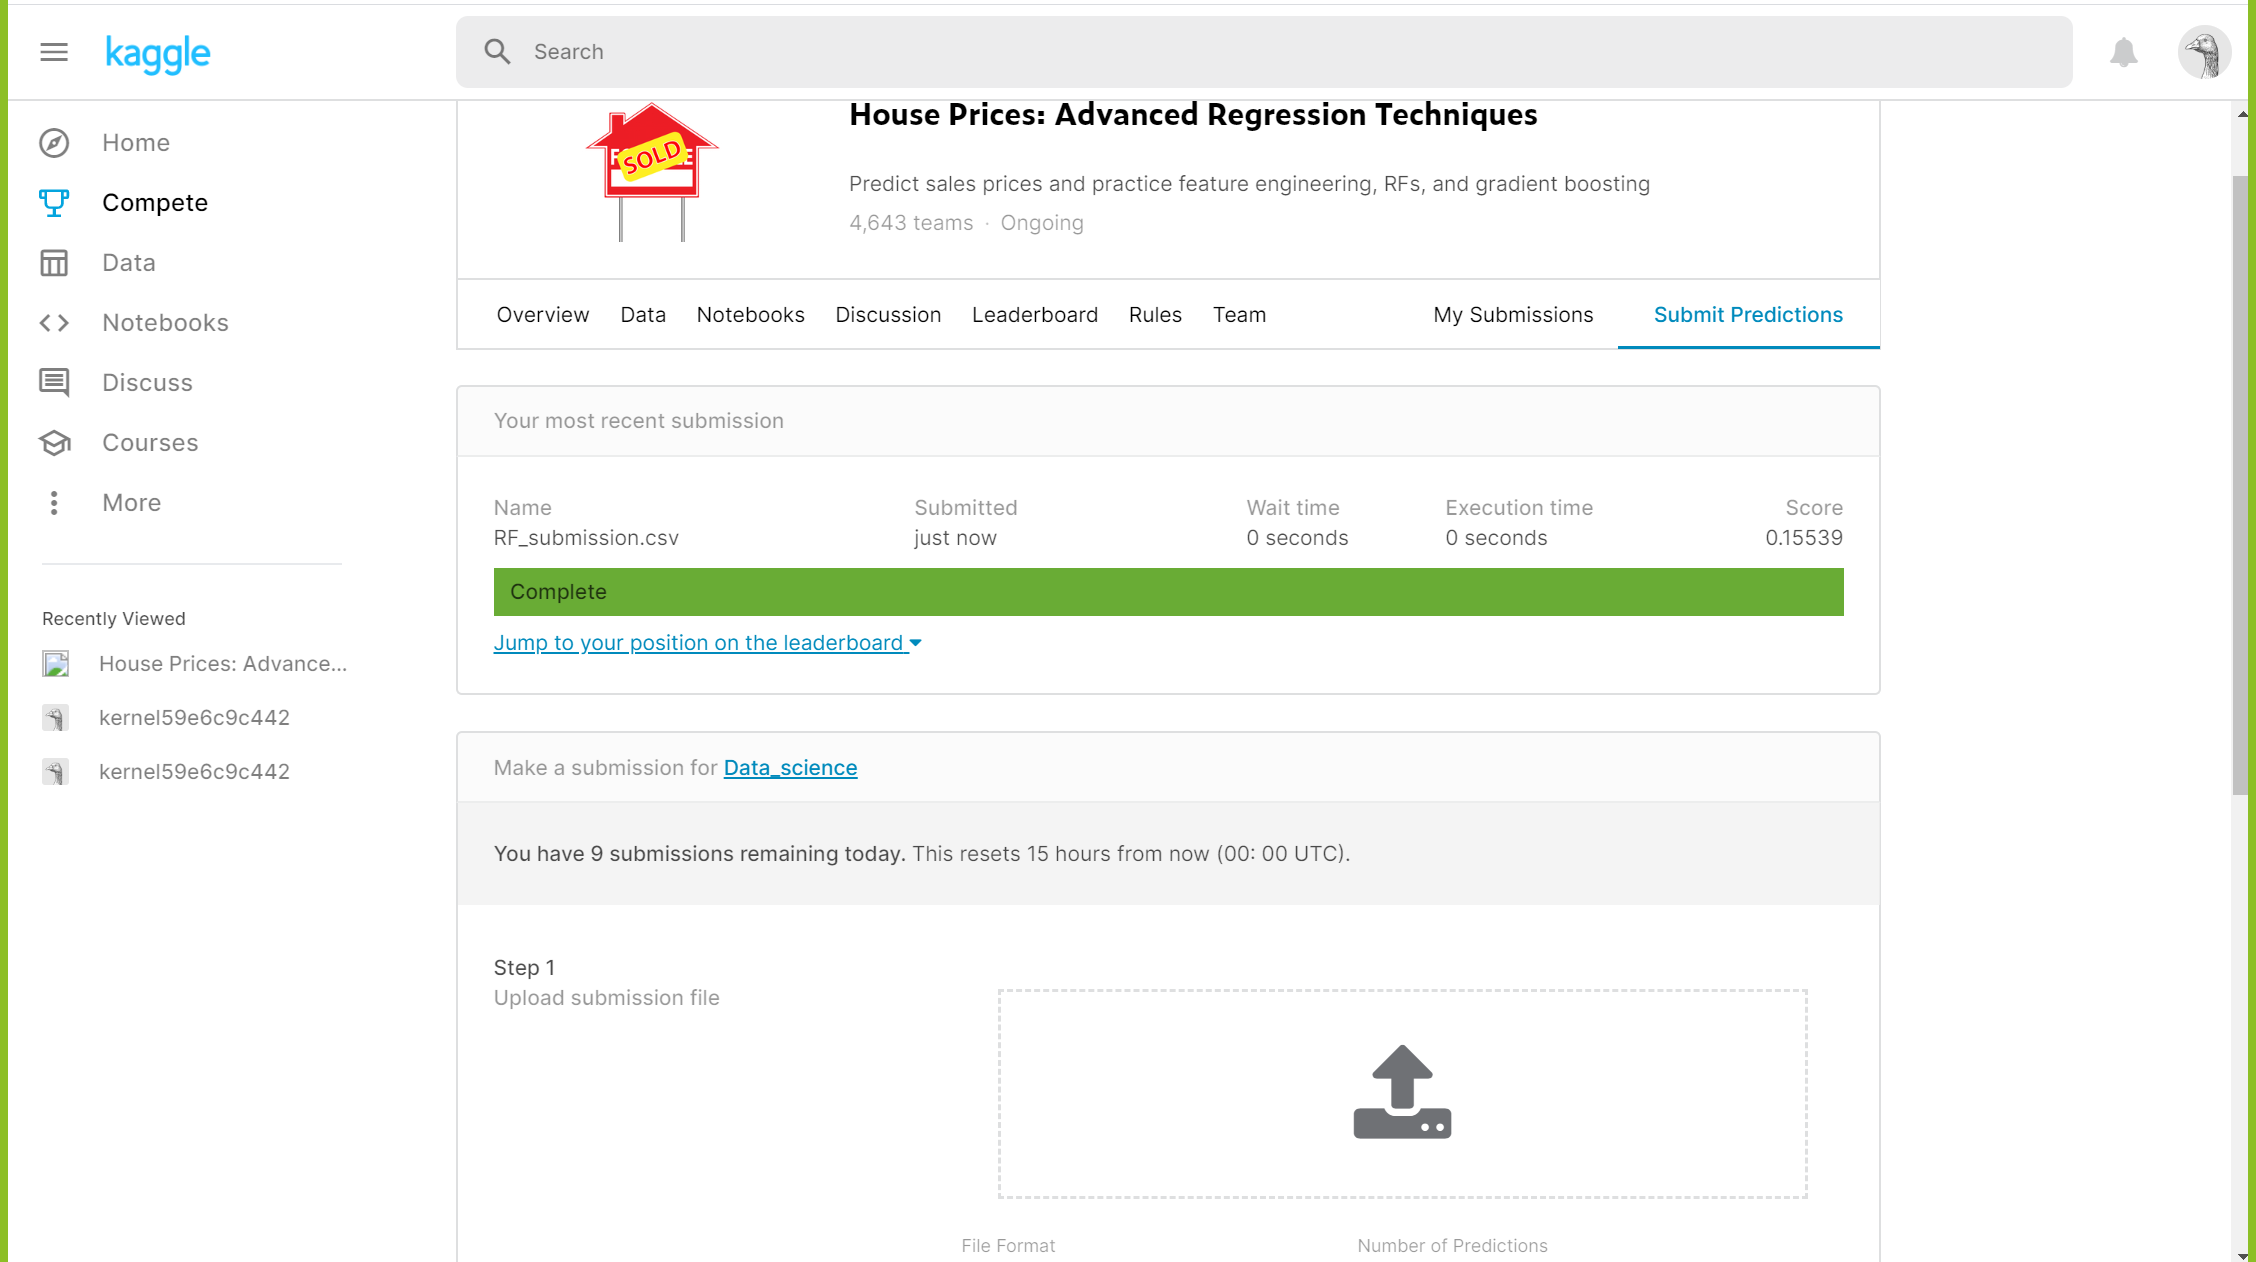